Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

#  Изучаем общую информацию

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

calls = pd.read_csv('D://Игорь/projects/calls.csv')
internet = pd.read_csv('D://Игорь/projects/internet.csv')
messages = pd.read_csv('D://Игорь/projects/messages.csv')
tariffs = pd.read_csv('D://Игорь/projects/tariffs.csv')
users = pd.read_csv('D://Игорь/projects/users.csv')

display(calls.head())
display(internet.head())
display(messages.head())
display(tariffs.head())
display(users.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [2]:
calls.info()
calls.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [3]:
internet.info()
internet.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [4]:
messages.info()
messages.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


id              0
message_date    0
user_id         0
dtype: int64

In [5]:
tariffs.info()
tariffs.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [6]:
users.info()
users.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

 Вот и первый датасет в котором отсутствуют значения. churn_date - дата окончания пользования тарифом. Если это значение отсутствует, логично предположить что пользователь не прекратил пользоваться тарифом
 

## Вывод:

У нас имеются 5 датасетов: звонки, интернет, сообщения, трафик и пользователь. 
Пропущеные значения есть только в датасете трафик, но они не кретичные т.к. они означают что пользователь все еще пользуется данным тарифом

#  Подготовка данных

## Приведем данные к нужным типам;
- Найти и исправить ошибки в данных, если они есть.
- Пояснить, какие ошибки нашли и как их исправили. 
- В данных имеются звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.


In [7]:
#Начнем с датасета calls
display(calls.head())
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
calls['duration_round'] = calls.duration.apply(lambda x: math.ceil(x)) 
calls.info()
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id                202607 non-null object
call_date         202607 non-null datetime64[ns]
duration          202607 non-null float64
user_id           202607 non-null int64
duration_round    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,duration_round
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


In [8]:
#далее с датасетом internet
display(internet.head())
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
internet = internet.drop('Unnamed: 0', axis = 1)
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [9]:
# далее с датасетом messages
display(messages.head())
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [10]:
display(users.head())
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [11]:
display(tariffs.head())
tariffs['gb_per_month_included'] = tariffs.mb_per_month_included/1024
tariffs['gb_per_month_included'] = tariffs['gb_per_month_included'].astype(int)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
gb_per_month_included    2 non-null int64
dtypes: int64(8), object(1)
memory usage: 272.0+ bytes


### Вывод:

Заменили тип данных на "дата/время" во всех датасетах.
В тарифах создали колонку "гигабайты в месяц"
В датасете "интернет" убрали бесполезный столбец "Unnamed: 0"

# Подготовка данных

In [12]:
# нам необходимо создать разделение по месяцам
name_month = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']
dict_month = {key:value for key, value in zip(range(1,13),name_month)}
def add_month(df):
    for col in df.columns:
        if df[col].dtype == '<M8[ns]':
            df['month_num'] = pd.DatetimeIndex(df[col]).month
            df['month'] = df.month_num.map(dict_month)
    return df

In [13]:
calls = add_month(calls)
display(calls.head())

,id,call_date,duration,user_id,duration_round,month_num,month
0,1000_0,2018-07-25,0.00,1000,0,7,Июль
1,1000_1,2018-08-17,0.00,1000,0,8,Август
2,1000_2,2018-06-11,2.85,1000,3,6,Июнь
3,1000_3,2018-09-21,13.80,1000,14,9,Сентябрь
4,1000_4,2018-12-15,5.18,1000,6,12,Декабрь


In [14]:
messages = add_month(messages)
display(messages.head())

,id,message_date,user_id,month_num,month
0,1000_0,2018-06-27,1000,6,Июнь
1,1000_1,2018-10-08,1000,10,Октябрь
2,1000_2,2018-08-04,1000,8,Август
3,1000_3,2018-06-16,1000,6,Июнь
4,1000_4,2018-12-05,1000,12,Декабрь


In [15]:
internet = add_month(internet)
display(internet.head())

,id,mb_used,session_date,user_id,month_num,month
0,1000_0,112.95,2018-11-25,1000,11,Ноябрь
1,1000_1,1052.81,2018-09-07,1000,9,Сентябрь
2,1000_2,1197.26,2018-06-25,1000,6,Июнь
3,1000_3,550.27,2018-08-22,1000,8,Август
4,1000_4,302.56,2018-09-24,1000,9,Сентябрь


Создали столбец с привязкой по месяцам для дальнейшего анализа

Посчитайте для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;


In [16]:
calls_month = calls.groupby(['user_id','month']).agg({'id':'count', 'duration_round':'sum'}).reset_index()
calls_month.columns = ['user_id','month','calls_count','calls_minutes']

messages_month = messages.groupby(['user_id','month']).id.count().reset_index()
messages_month.columns = ['user_id','month','messages_count']

internet_month = internet.groupby(['user_id','month']).mb_used.sum().reset_index()
internet_month.columns = ['user_id','month','internet_vol']
internet_month['internet_volgb'] = internet_month.internet_vol.apply(lambda x:math.ceil(x/1024))

all_month = calls_month.merge(messages_month, on = ['user_id','month'], how='outer').merge(internet_month, on = ['user_id','month'],how='outer')
all_month = all_month.fillna(0)
all_month = all_month.merge(users[['user_id','city','tariff']], on = ['user_id'], how='left')

all_month = all_month.merge(tariffs, left_on = ['tariff'], right_on = ['tariff_name'])
all_month.head()

,user_id,month,calls_count,calls_minutes,messages_count,internet_vol,internet_volgb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,1000,Август,52.0,408.0,81.0,14055.93,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
1,1000,Декабрь,46.0,333.0,70.0,9817.61,10.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
2,1000,Июль,47.0,340.0,75.0,14003.64,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
3,1000,Июнь,43.0,172.0,60.0,23233.77,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
4,1000,Май,22.0,159.0,22.0,2253.49,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30


Посчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [17]:
def revenue(row):
    minutes_tax = max(row.calls_minutes-row.minutes_included,0)*row.rub_per_minute
    messages_tax = max(row.messages_count-row.messages_included,0)*row.rub_per_message
    internet_tax = max(row.internet_volgb-row.gb_per_month_included,0)*row.rub_per_gb
    return row.rub_monthly_fee + minutes_tax + messages_tax + internet_tax

In [18]:
all_month['revenue'] = all_month.apply(revenue, axis = 1)
df = all_month[['user_id', 'city', 'month', 'calls_minutes', 'messages_count', 'internet_volgb', 'tariff', 'revenue']].sort_values(by = 'user_id')
df.head()


,user_id,city,month,calls_minutes,messages_count,internet_volgb,tariff,revenue
0,1000,Краснодар,Август,408.0,81.0,14.0,ultra,1950.0
1,1000,Краснодар,Декабрь,333.0,70.0,10.0,ultra,1950.0
2,1000,Краснодар,Июль,340.0,75.0,14.0,ultra,1950.0
3,1000,Краснодар,Июнь,172.0,60.0,23.0,ultra,1950.0
4,1000,Краснодар,Май,159.0,22.0,3.0,ultra,1950.0


# Анализ данных

Сколько минут разговора, сообщений и интернет трафика требуется пользователям каждого тарифа в месяц?
Считаем среднее , дисперсию и стандартное отклонение

In [19]:
pd.options.display.float_format = '{:,.2f}'.format
pd.pivot_table(df, values=['calls_minutes','messages_count','internet_volgb'], index = ['tariff'], aggfunc = [np.mean,np.var,np.std])

mean                                         var  \
       calls_minutes internet_volgb messages_count calls_minutes   
tariff                                                             
smart         417.93          16.33          33.38     36,219.32   
ultra         526.62          19.49          49.36    100,873.63   

                                               std                 \
       internet_volgb messages_count calls_minutes internet_volgb   
tariff                                                              
smart           33.03         796.81        190.31           5.75   
ultra           97.09       2,285.27        317.61           9.85   

                       
       messages_count  
tariff                 
smart           28.23  
ultra           47.80

- Тариф смарт: тратят в среднем 418 из 500 минутЮ ст отклонение 190 мин, 16,33 из 15 (на 1,33гб больше стандартного),ст отклонение 5,75гб, 33 из 50 сообщения, ст отклонение 28смс.
- Тариф ультра: трватят в среднем 527 минут из 3000, ст отклонение 317, 19,49гб из 30гб, ст отклонение 9,85, и 49 из 1000смс, отклонение 48.
- Итого, в обоих тарифах люди практически полностью "ужимаются" в тариф, за исключением интернет трафика в тарифе смарт. они приобретают себе доп интернет, в среднем тратят почти нап 1,5гига больше чем в их тарифе

In [20]:
df_smart = df.query('tariff == "smart"')
df_ultra = df.query('tariff == "ultra"')

In [21]:
def histograms(df_smart, df_ultra, name, bins, length):
    ax = (df_smart
         .plot(kind='hist',
              bins=bins,
              range=length,
              alpha=0.7,
              grid=True,
              density=True,
              legend=True,
              linewidth= 3,
              figsize=(12,6),
              label = 'smart')
         )
    (df_ultra
    .plot(kind='hist',
         ax = ax,
         bins = bins,
         range = length,
         alpha = 0.6,
         grid=True,
         density=True,
         legend=True,
         linewidth= 3,
         figsize=(12,6),
         label='ultra')
    )

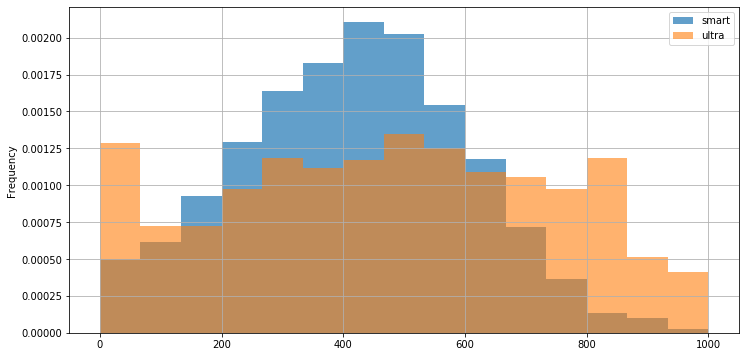

In [22]:
histograms(df_smart['calls_minutes'], df_ultra['calls_minutes'], 'Звонки в минутах', bins=15, length = (0,1000))

В целом видно что у тарифа смарт идет распределение более равномерное и пик приблизительно на 500 минутах.
У тарифа ультра больше людей используют 700 и более минут

Text(0, 0.5, 'Количество людей')

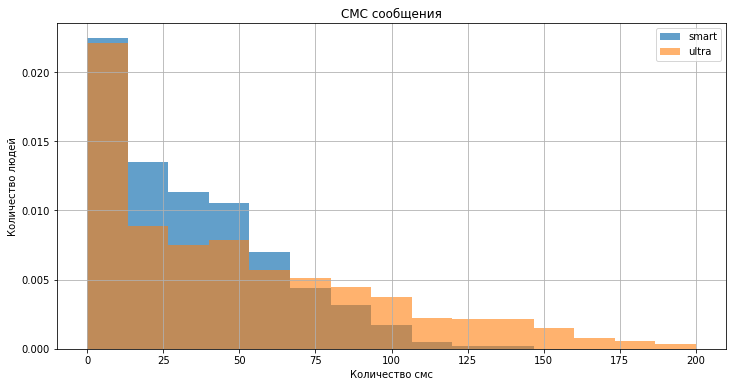

In [29]:
histograms(df_smart['messages_count'], df_ultra['messages_count'], 'СМС сообщения', bins=15, length = (0,200))
plt.title('СМС сообщения', fontsize=12)
plt.xlabel('Количество смс')
plt.ylabel('Количество людей')

У тарифа смарт больше людей, использующих 10-60 смс, но в тарифе ультра есть люди, используещие > 150смс

Text(0, 0.5, 'Количество людей')

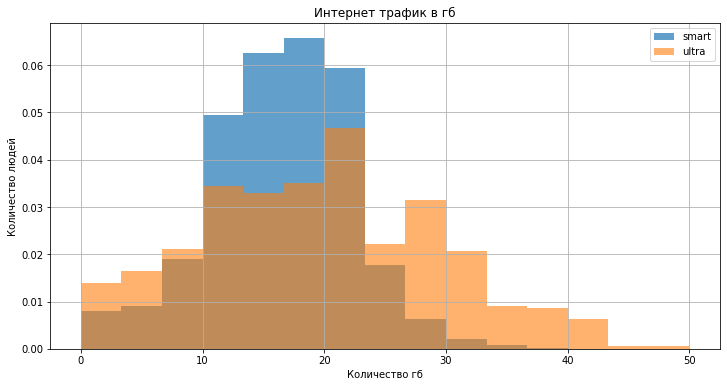

In [30]:
histograms(df_smart['internet_volgb'], df_ultra['internet_volgb'], 'Интернет трафик в гб', bins=15, length = (0,50))
plt.title('Интернет трафик в гб', fontsize=12)
plt.xlabel('Количество гб')
plt.ylabel('Количество людей')

- Пользователи тарифа смарт больше пользуются трафиком интернета от 10 до 23гб, но пользователи ультра в разы больше пользуются трафиком свыше 23гб

# Шаг 4. Проверьте гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
- Пороговое значение alpha задайте самостоятельно.
- Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

In [25]:
# Выручка смарт и ультра
for tarif in ['ultra', 'smart']:
    print(f'Размер выборки тарифа {tarif}: {len(df[df.tariff == tarif])}')
    print(f'Дисперсия выборки тарифа {tarif}: {np.var(df[df.tariff == tarif].revenue)}')

Размер выборки тарифа ultra: 985
Дисперсия выборки тарифа ultra: 141373.07325620344
Размер выборки тарифа smart: 2229
Дисперсия выборки тарифа smart: 669485.2209234245


Создаем нулевую гипотезу что разницы в выручке между пользователями тарифа смарт и ультра не равны))

In [26]:
alpha = .05
tstat, pvalue = st.ttest_ind(df[df.tariff == 'ultra'].revenue, df[df.tariff == 'smart'].revenue, equal_var = False)
print(f'р-значение: {pvalue}')
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нельзя отвергнуть нулевую гипотезу')

р-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Выручка пользователей тарифа ультрв больше, по этому отвергаем нулевую гипотезу

In [27]:
# Выручка в МСК
print(f'Размер выборки пользователей из Москвы: {len(df[df.city == "Москва"])}')
print(f'Дисперсия выборки пользователей из Москвы: {np.var(df[df.city == "Москва"])}')
print(f'Размер выборки пользователей из других регионов: {len(df[df.city != "Москва"])}')
print(f'Дисперсия выборки пользователей из других регионов: {np.var(df[df.city != "Москва"])}')

Размер выборки пользователей из Москвы: 611
Дисперсия выборки пользователей из Москвы: user_id           18,883.66
calls_minutes     58,243.70
messages_count     1,378.63
internet_volgb        58.36
revenue          564,710.71
dtype: float64
Размер выборки пользователей из других регионов: 2603
Дисперсия выборки пользователей из других регионов: user_id           21,311.13
calls_minutes     58,469.99
messages_count     1,289.27
internet_volgb        53.74
revenue          653,886.33
dtype: float64


Нулевая гипотеза: выручка в МСК и других регионах равна.

In [28]:
alpha = .05
tstat, pvalue = st.ttest_ind(df[df.city == 'Москва'].revenue, df[df.city != 'Москва'].revenue, equal_var = False)
print(f'р-значение: {pvalue}')
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нельзя отвергнуть нулевую гипотезу')

р-значение: 0.5257376663729298
Нельзя отвергнуть нулевую гипотезу


нельзя отвергнуть нулевую гипотезу, значит выручка в мск и других регионах практически не различаетмся

# Вывод

Мы получили 5 датасетов с данными.
В датасетах изменили формат столбцов с датами в "дата, варемя"
Пропущеные значения были только в датасете "трафик", но они не критичные по этому мы их не заменяли.
Перевели значения из мб в гб.
В целом данные достатьочно "чистые"
Посчитака помесячная выручка с каждого пользователя
Опровергнута гипотеза что выруцчки с разных тарифов равны.
Не опровергнута гипотеза о том что в Москве и других регионах равные выручки

Целесообразнее рекламную компанию распределить в пользу ультры, т.к. полльзователи приносят больше дозода
